In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer


In [2]:
!pip install neattext

In [3]:
import neattext.functions as nfx

Loading DataSet

In [4]:
df = pd.read_csv("train1.csv")

In [5]:
df.head()

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [6]:
df.shape

(41459, 2)

In [7]:
df.dtypes

Text       object
Emotion    object
dtype: object

In [8]:
#Dropping Null Values

df = df.dropna()

In [9]:
emotions = df.copy()

<AxesSubplot:xlabel='Emotion', ylabel='count'>

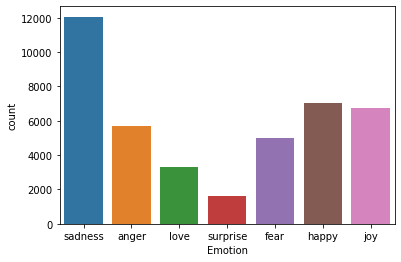

In [10]:
sns.countplot(x = 'Emotion',data = emotions)

### EDA 
+ Text Cleaning
+ Sentiment Analysis
+ Keyword Extraction
  - keywords for each emotion
  - wordcloud

In [11]:
#Sentiment Analysis
from textblob import TextBlob
def get_sentiment(text):
  blob = TextBlob(text)
  sentiment = blob.sentiment.polarity
  if sentiment > 0:
    result = 'Positive'
  elif sentiment <0 :
    result = 'Negative'
  else:
    result = 'Neutral'
  return result

In [12]:
emotions['Sentiment'] = emotions['Text'].apply(get_sentiment)

In [13]:
emotions.head()

,Text,Emotion,Sentiment
0,i didnt feel humiliated,sadness,Neutral
1,i can go from feeling so hopeless to so damned...,sadness,Neutral
2,im grabbing a minute to post i feel greedy wrong,anger,Negative
3,i am ever feeling nostalgic about the fireplac...,love,Negative
4,i am feeling grouchy,anger,Neutral


In [14]:
# Compare our Emotions vs Sentiment
emotions.groupby(['Emotion','Sentiment']).size()

Emotion   Sentiment
anger     Negative     2701
          Neutral      1480
          Positive     1521
fear      Negative     2225
          Neutral      1223
          Positive     1577
happy     Negative      781
          Neutral      1035
          Positive     5213
joy       Negative      737
          Neutral       975
          Positive     5049
love      Negative      636
          Neutral       468
          Positive     2178
sadness   Negative     5709
          Neutral      3024
          Positive     3329
surprise  Negative      621
          Neutral       228
          Positive      749
dtype: int64

C:\Users\HP\.conda\envs\emotion-detect\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


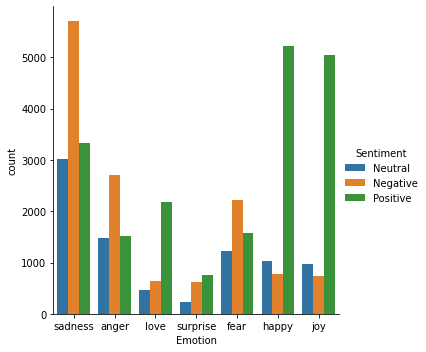

In [15]:
sns.factorplot(x='Emotion',hue='Sentiment',kind='count',data=emotions)

### Text Cleaning
+ Remove Noise
  - Stopwords
  - Special Characters
  - Punctuations
  - Emojis
  

In [16]:
emotions.head()

,Text,Emotion,Sentiment
0,i didnt feel humiliated,sadness,Neutral
1,i can go from feeling so hopeless to so damned...,sadness,Neutral
2,im grabbing a minute to post i feel greedy wrong,anger,Negative
3,i am ever feeling nostalgic about the fireplac...,love,Negative
4,i am feeling grouchy,anger,Neutral


In [17]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
emotions['Clean_Text'] = ""
emotions.head()


,Text,Emotion,Sentiment,Clean_Text
0,i didnt feel humiliated,sadness,Neutral,
1,i can go from feeling so hopeless to so damned...,sadness,Neutral,
2,im grabbing a minute to post i feel greedy wrong,anger,Negative,
3,i am ever feeling nostalgic about the fireplac...,love,Negative,
4,i am feeling grouchy,anger,Neutral,


In [19]:
lemmetize = WordNetLemmatizer()
corpus = []
for i in range(0,len(emotions)):
  tweet = re.sub('[^a-zA-Z]',' ',emotions['Text'][i])
  tweet = tweet.lower()
  tweet = tweet.split()
  tweet = [lemmetize.lemmatize(word) for word in tweet if word not in set(stopwords.words('english'))]
  tweet = ' '.join(tweet)
  emotions['Clean_Text'][i]= tweet
  corpus.append(tweet)

In [20]:
emotions['Clean_Text'].head(10)

0                                didnt feel humiliated
1    go feeling hopeless damned hopeful around some...
2            im grabbing minute post feel greedy wrong
3    ever feeling nostalgic fireplace know still pr...
4                                      feeling grouchy
5        ive feeling little burdened lately wasnt sure
6    ive taking milligram time recommended amount i...
7       feel confused life teenager jaded year old man
8    petronas year feel petronas performed well mad...
9                                        feel romantic
Name: Clean_Text, dtype: object

In [21]:
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [22]:
X.shape

(41459, 5000)

In [23]:
emotions[['Text', 'Clean_Text']]

,Text,Clean_Text
0,i didnt feel humiliated,didnt feel humiliated
1,i can go from feeling so hopeless to so damned...,go feeling hopeless damned hopeful around some...
2,im grabbing a minute to post i feel greedy wrong,im grabbing minute post feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...,ever feeling nostalgic fireplace know still pr...
4,i am feeling grouchy,feeling grouchy
...,...,...
41454,im having ssa examination tomorrow in the morn...,im ssa examination tomorrow morning im quite w...
41455,i constantly worry about their fight against n...,constantly worry fight nature push limit inner...
41456,i feel its important to share this info for th...,feel important share info experience thing
41457,i truly feel that if you are passionate enough...,truly feel passionate enough something stay tr...


### Keyword Extraction
  + Extract most common words per class of emotions

In [24]:
from collections import Counter

In [25]:
def extract_keywords(text,num=50):
  tokens = [ tok for tok in text.split()]
  most_common_tokens = Counter(tokens).most_common(num)
  return dict(most_common_tokens)

In [26]:
emotions.head()


,Text,Emotion,Sentiment,Clean_Text
0,i didnt feel humiliated,sadness,Neutral,didnt feel humiliated
1,i can go from feeling so hopeless to so damned...,sadness,Neutral,go feeling hopeless damned hopeful around some...
2,im grabbing a minute to post i feel greedy wrong,anger,Negative,im grabbing minute post feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...,love,Negative,ever feeling nostalgic fireplace know still pr...
4,i am feeling grouchy,anger,Neutral,feeling grouchy


In [27]:
emotion_list = emotions['Emotion'].unique().tolist()
print(emotion_list)

['sadness', 'anger', 'love', 'surprise', 'fear', 'happy', 'joy']


In [28]:
#Joy
joy_list = emotions[emotions['Emotion'] == 'joy']['Clean_Text'].tolist()
joy_docx = ' '.join(joy_list)
#Extract Keywords
keyword_joy = extract_keywords(joy_docx)

#Surprise
surprise_list = emotions[emotions['Emotion'] == 'surprise']['Clean_Text'].tolist()
surprise_docx = ' '.join(surprise_list)
keyword_surprise = extract_keywords(surprise_docx)

In [29]:
def plot_most_common_words(mydict):
  df_01 = pd.DataFrame(mydict.items(),columns = ['tokens','count'])  
  sns.barplot(x = 'tokens',y='count',data = df_01)
  plt.xticks(rotation=45)
  plt.show()

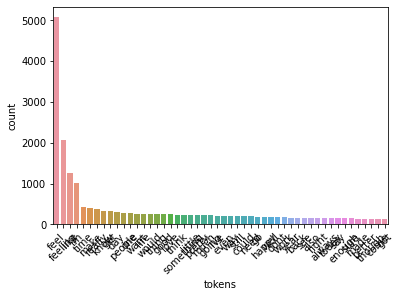

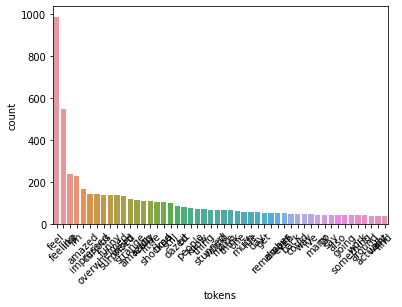

In [30]:
plot_most_common_words(keyword_joy)
plot_most_common_words(keyword_surprise)

In [31]:
from wordcloud import WordCloud

In [32]:
def plot_wordcloud(docx):
  mywordcloud = WordCloud().generate(docx)
  plt.imshow(mywordcloud,interpolation = 'bilinear')
  plt.axis('off')
  plt.show()

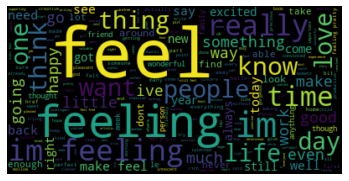

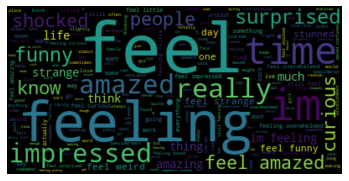

In [33]:
plot_wordcloud(joy_docx)
plot_wordcloud(surprise_docx)


### Machine Learning
+ Naive Bayes
+ Logistic Regression
+ KNN
+ SVM

In [34]:
# Load ML Packages

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn import neighbors, datasets, preprocessing
from sklearn.linear_model import SGDClassifier


#Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix

In [35]:
#Split the dataset
from sklearn.model_selection import train_test_split

### Build feature from text

In [36]:
Xfeature = emotions["Clean_Text"]
ylabels = emotions["Emotion"]

In [37]:
# Vectorization
cv = CountVectorizer()
X = cv.fit_transform(Xfeature).toarray()

#cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
#X = cv.fit_transform(corpus).toarray()

In [38]:
# Get Features By Name
cv.get_feature_names()

['aa',
 'aaaaaaand',
 'aaaaand',
 'aaaah',
 'aaaand',
 'aac',
 'aahhh',
 'aaron',
 'ab',
 'abandon',
 'abandoned',
 'abandoning',
 'abandonment',
 'abated',
 'abba',
 'abbigail',
 'abc',
 'abd',
 'abdomen',
 'abdominal',
 'abducted',
 'abelard',
 'abhorrent',
 'abide',
 'abigail',
 'ability',
 'abit',
 'abjectly',
 'able',
 'ableness',
 'ablo',
 'abnormally',
 'aboard',
 'abolitionist',
 'abominable',
 'abortion',
 'abou',
 'abound',
 'abraham',
 'abroad',
 'abruptly',
 'absence',
 'absoloutely',
 'absolute',
 'absolutely',
 'absolutly',
 'absorbed',
 'absorption',
 'abstain',
 'abstinence',
 'abstract',
 'absurd',
 'absurdity',
 'absurdly',
 'abt',
 'abu',
 'abundance',
 'abundantly',
 'abus',
 'abuse',
 'abused',
 'abusing',
 'abusive',
 'abyss',
 'ac',
 'academia',
 'academic',
 'academy',
 'acause',
 'accelerated',
 'accent',
 'accentuating',
 'accept',
 'acceptable',
 'acceptance',
 'accepted',
 'accepting',
 'accepts',
 'access',
 'accessary',
 'accessibility',
 'accessible',
 'a

In [39]:
#split Dataset
X_train,X_test,y_train,y_test = train_test_split(X,ylabels,test_size = 0.3, random_state = 42)

### Build Model


In [40]:
# For predicting emotion of a sample text 
def predict_emotion(sample_text,model):
  myvect = cv.transform(sample_text).toarray()
  prediction = model.predict(myvect)
  pred_proba = model.predict_proba(myvect)
  pred_percentage_for_all = dict(zip(model.classes_,pred_proba[0]))
  print("Prediction : {}, Prediction_Score : {}".format(prediction[0],np.max(pred_proba)))
  print(prediction[0])

  return pred_percentage_for_all

#### Naive Bayes


In [41]:
nv_model = MultinomialNB()
nv_model.fit(X_train,y_train)

MultinomialNB()

In [42]:
#Making a Single Prediction
sample_text = ["I am so happy to get admission in my favourite university "]
vect = cv.transform(sample_text).toarray()
#Make Prediction
nv_model.predict(vect)

array(['joy'], dtype='<U8')

In [43]:
# Check for the Prediction Probability / Confidence score
nv_model.predict_proba(vect)

array([[0.00759725, 0.00465942, 0.36805479, 0.57244111, 0.01363531,
        0.03212331, 0.0014888 ]])

In [44]:
predict_emotion(sample_text,nv_model)

Prediction : joy, Prediction_Score : 0.57244111246217
joy


{'anger': 0.007597251669733516,
 'fear': 0.004659424250720152,
 'happy': 0.36805479140742325,
 'joy': 0.57244111246217,
 'love': 0.013635313069833049,
 'sadness': 0.03212331172508266,
 'surprise': 0.001488795415039886}

##### Model Evaluation - Naive Bayes



In [45]:
y_pred_for_nv = nv_model.predict(X_test)

In [46]:
#Classification Report
print(classification_report(y_test,y_pred_for_nv))

              precision    recall  f1-score   support

       anger       0.92      0.83      0.87      1697
        fear       0.86      0.84      0.85      1496
       happy       0.23      0.20      0.22      2123
         joy       0.23      0.25      0.24      1969
        love       0.91      0.71      0.80      1020
     sadness       0.80      0.96      0.88      3660
    surprise       0.82      0.37      0.51       473

    accuracy                           0.64     12438
   macro avg       0.68      0.59      0.62     12438
weighted avg       0.65      0.64      0.64     12438



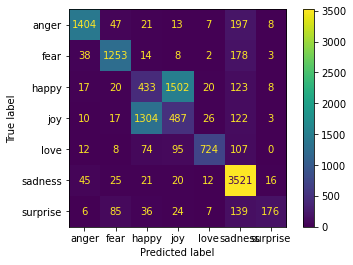

In [47]:
#Confusion Matrix
plot_confusion_matrix(nv_model,X_test,y_test)

### Logistics Regression

In [48]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)

C:\Users\HP\.conda\envs\emotion-detect\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [49]:
# Accuracy 
lr_model.score(X_test,y_test)

0.702765717961087

### SVM

In [50]:
lsvm = SGDClassifier(alpha=0.001, random_state=5, max_iter=15, tol=None)
lsvm.fit(X_train, y_train)
y_pred = lsvm.predict(X_test)
print('svm using tfidf accuracy %s' % accuracy_score(y_pred, y_test))

MemoryError: Unable to allocate 3.68 GiB for an array with shape (29021, 17025) and data type float64

### Model Interpretation

In [ ]:
import eli5

In [ ]:
class_names = ylabels.unique().tolist()
class_names

In [ ]:
feature_names = cv.get_feature_names()

In [ ]:

eli5.show_weights(lr_model,feature_names=feature_names,target_names=class_names)

## Save Model

In [ ]:
import joblib

In [ ]:
model_file = open("emotion_classifier_ml_model.pkl","wb")
joblib.dump(nv_model,model_file)
model_file.close()